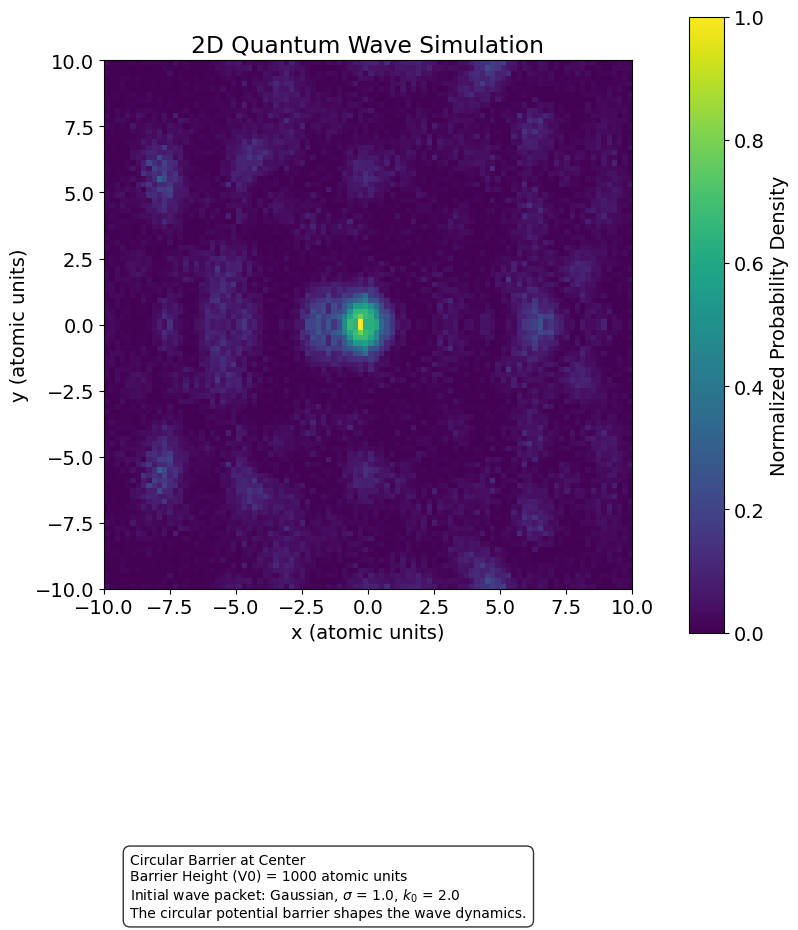

In [3]:
# This code simulates the time evolution of a two-dimensional quantum wave packet in a potential field. It demonstrates concepts from quantum mechanics using numerical methods.
# The script starts by importing necessary libraries: numpy for numerical operations and matplotlib for plotting and animation.
# Key constants and parameters are defined, such as Planck's constant (hbar), particle mass (m), grid size (N), time step (dt), and the potential barrier height (V0).
# A spatial grid is created using numpy's linspace and meshgrid functions. The script also sets up corresponding momentum space grids using Fourier transform properties.
# The potential field is defined as a circular barrier in the center of the grid. This setup allows for the observation of wave packet interactions with the barrier.
# The initial wavefunction is defined as a Gaussian wave packet with a specified width (sigma) and initial momentum (k0). The wavefunction is normalized to ensure its total probability is one.
# Time evolution operators in both position and momentum space are constructed. These operators are essential for simulating the wavefunction's time evolution according to the Schrödinger equation.
# A time_step function is defined to perform one step of the time evolution. This function applies the time evolution operators in momentum and position space using Fourier transforms.
# The plotting setup includes creating a figure with a subplot for the wavefunction and a colorbar. The plot's aesthetics, such as titles and labels, are also configured.
# The updatefig function, used in the animation, updates the wavefunction at each frame and normalizes the probability density for visualization.
# An animation is created using FuncAnimation from matplotlib, which calls the updatefig function iteratively to simulate the wave packet's dynamics.
# To save the animation, FFMpegWriter is used. This part of the script specifies the output file's properties like frame rate and bit rate and saves the animation as an MP4 file.
# Overall, this script visualizes the dynamic behavior of a quantum wave packet in a potential field, illustrating fundamental concepts in quantum mechanics through computational methods.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Constants
hbar = 1
m = 1
N = 100
dt = 0.1
V0 = 1000
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)

# Grids
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]
dkx = 2 * np.pi / (N * dx)
dky = 2 * np.pi / (N * dy)
kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi
ky = np.fft.fftfreq(N, d=dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)

# Potential (circular barrier in the center)
R = np.sqrt(X**2 + Y**2)
V = np.where(R < 1, V0, 0)

# Wavefunction (Gaussian wave packet)
sigma = 1.0
k0 = 2.0
psi_x = np.exp(-(X**2 + Y**2) / (2 * sigma**2)) * np.exp(1j * k0 * X)
psi_x /= np.linalg.norm(psi_x)

# Time evolution operator in momentum space
U_k = np.exp(-1j * (KX**2 + KY**2) * dt / (2 * m))

# Time evolution operator in position space (excluding the potential)
U_x = np.exp(-1j * V * dt / (2 * hbar))

# Function for time step evolution
def time_step(psi_x):
    # FFT to momentum space
    psi_k = np.fft.fft2(psi_x)
    # Apply the time evolution operator in momentum space
    psi_k *= U_k
    # IFFT back to position space
    psi_x = np.fft.ifft2(psi_k)
    # Apply the time evolution operator in position space
    psi_x *= U_x
    return psi_x

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Create a larger figure with subplots for the visualization and the colorbar
fig, (ax, cax) = plt.subplots(figsize=(8, 8), ncols=2, gridspec_kw={"width_ratios": [15, 1]})

# Function for normalization
def normalize(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    return (arr - arr_min) / (arr_max - arr_min)

# Plot the circular barrier
barrier_radius = N // 10
barrier = (X ** 2 + Y ** 2) < barrier_radius ** 2
V[barrier] = V0
ax.imshow(V, extent=(-10, 10, -10, 10), cmap='gray')

# Initial plot
im = ax.imshow(normalize(np.abs(psi_x)**2), extent=(-10, 10, -10, 10), animated=True, cmap='viridis')

# Setting labels and title
ax.set_title("2D Quantum Wave Simulation")
ax.set_xlabel("x (atomic units)")
ax.set_ylabel("y (atomic units)")

# Separate area for additional information
info_text_x = 0.05
info_text_y = -0.5  # Adjust this value to move the text box up or down

info_text = "Circular Barrier at Center\n"
info_text += f"Barrier Height (V0) = {V0} atomic units\n"
info_text += f"Initial wave packet: Gaussian, $\sigma$ = {sigma}, $k_0$ = {k0}\n"
info_text += "The circular potential barrier shapes the wave dynamics."

ax.text(info_text_x, info_text_y, info_text, transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
        fontsize=10, horizontalalignment='left', verticalalignment='top')


def updatefig(*args):
    global psi_x
    psi_x = time_step(psi_x)
    im.set_array(normalize(np.abs(psi_x)**2))  # Normalizing here
    return im,

# Extend the animation length
frames = 400  # Increase the number of frames for a longer animation
fps = 10      # Decrease the frame rate for a longer video

ani = FuncAnimation(fig, updatefig, frames=frames, interval=50, blit=False)

# Add colorbar with label in the separate subplot
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Normalized Probability Density")

# Adjusting the writer settings for the new frame rate
writer = FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)

# Saving the animation
ani.save('quantum_wave_simulation.mp4', writer=writer)
